In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import cm

target_colors = ["#8b324d" , "#387149"]

In [2]:
df_train = pd.read_csv(r"C:\Users\hp\Documents\Downloads\train_dataset.csv" , index_col = 0)
df_test = pd.read_csv(r"C:\Users\hp\Documents\Downloads\test_dataset.csv" , index_col = 0)
sample_sub = pd.read_csv(r"C:\Users\hp\Documents\Downloads\sample_submission.csv" , index_col = 0)

In [3]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [4]:
df_train.columns.unique()

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.


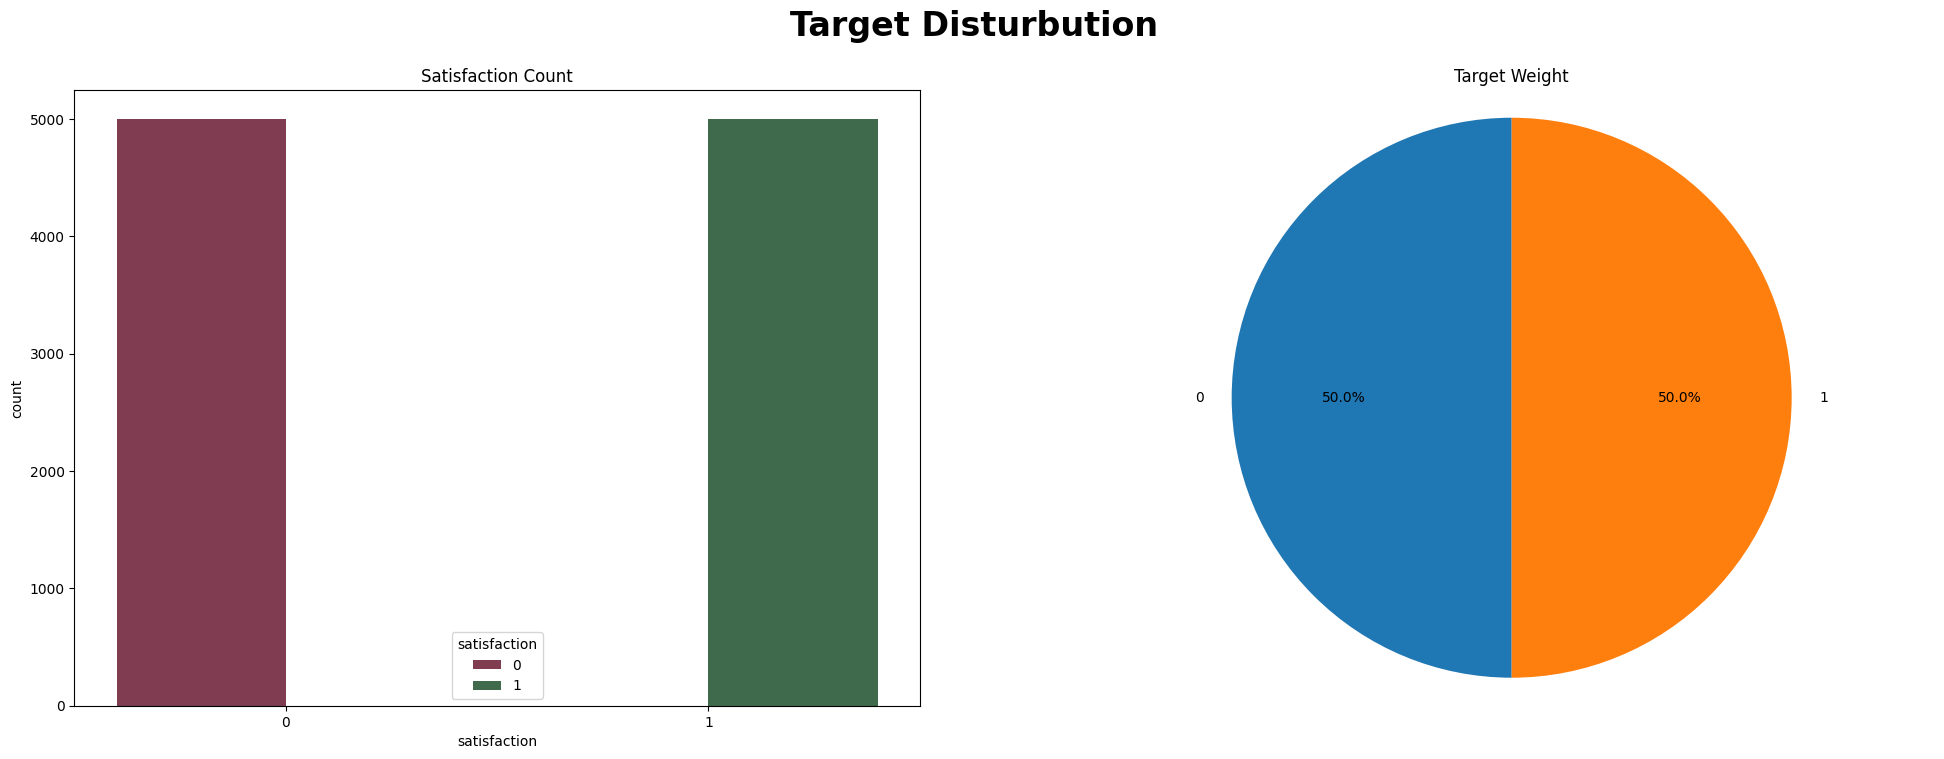

In [6]:
fig = plt.figure(figsize = (24 , 8))
plt.suptitle("Target Disturbution" , weight = 'bold' , fontsize = 24 , fontname = 'moonspace')
grid = gridspec.GridSpec(nrows = 1 , ncols = 2 , figure = fig)
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title("Satisfaction Count")

sns.countplot(x="satisfaction" , data = df_train , ax = ax1 , hue = 'satisfaction' , palette = target_colors)

for index,value in enumerate(df_train['satisfaction'].value_counts()):
    ax1.annotate(value , xy = (index,value+2000) , ha = "center" , va  = "center" , fontsize = 15)

# ax1.set_xtickslabel(df_train['satisfaction'].value_counts().index, fontsize = 15)

ax2 = fig.add_subplot(grid[0 ,1:])
ax2.set_title("Target Weight")
label = list(df_train['satisfaction'].value_counts().index)
values = df_train['satisfaction'].value_counts().values
ax2.pie(values , labels = label , autopct = "%1.1f%%", startangle = 90)
ax2.axis("equal")
plt.show()

findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.


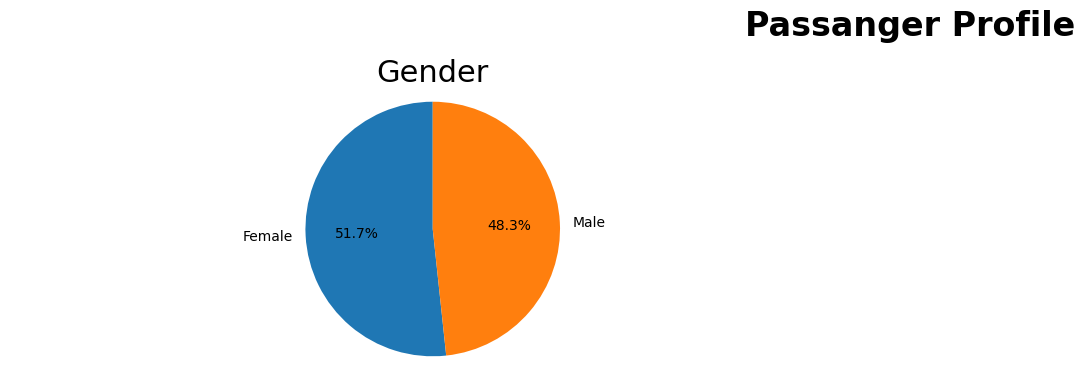

(-1.0999999590650051,
 1.0999998488557232,
 -1.0999998746163249,
 1.0999999940293488)

In [7]:
fig = plt.figure(figsize = (24 , 8))
plt.suptitle("Passanger Profile" , weight = 'bold' , fontsize = 24 , fontname = 'moonspace')
grid = gridspec.GridSpec(nrows = 2 , ncols = 2 , figure = fig)
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title("Gender" , fontsize = 22)

label = list(df_train['Gender'].value_counts().index)
values = list(df_train['Gender'].value_counts().values)

ax1.pie(values , labels = label , autopct = "%1.1f%%"  , startangle = 90)
ax1.axis("equal")
plt.show()

# Customer Type


ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title("Customer Type" , fontsize = 22)

label1 = list(df_train['Customer Type'].value_counts().index)
values1 = list(df_train['Customer Type'].value_counts().values)

ax2.pie(values1 , labels = label1 , autopct = "%1.1f%%"  , startangle = 90)
ax2.axis("equal")

(-1.0999999590650051,
 1.0999998488557232,
 -1.0999998746163249,
 1.0999999940293488)

findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.


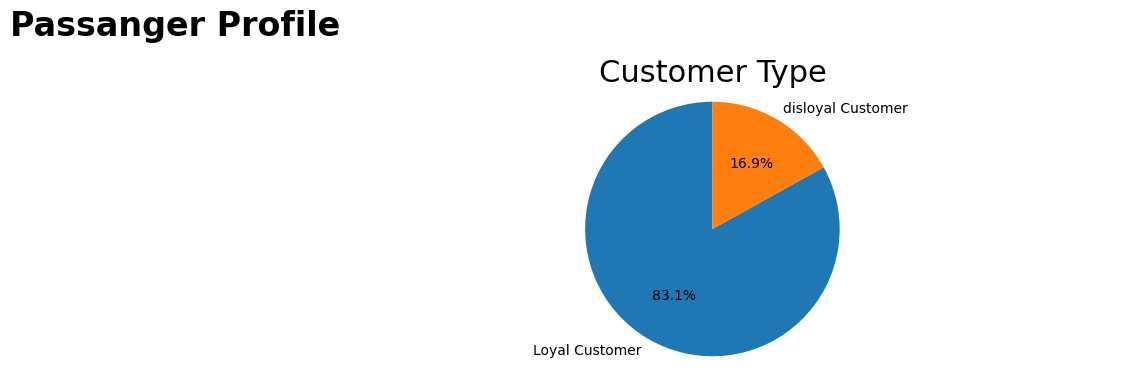

In [8]:
fig = plt.figure(figsize = (24 , 8))
plt.suptitle("Passanger Profile" , weight = 'bold' , fontsize = 24 , fontname = 'moonspace')
grid = gridspec.GridSpec(nrows = 2 , ncols = 2 , figure = fig)

ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title("Customer Type" , fontsize = 22)

label1 = list(df_train['Customer Type'].value_counts().index)
values1 = list(df_train['Customer Type'].value_counts().values)

ax2.pie(values1 , labels = label1 , autopct = "%1.1f%%"  , startangle = 90)
ax2.axis("equal")

findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.


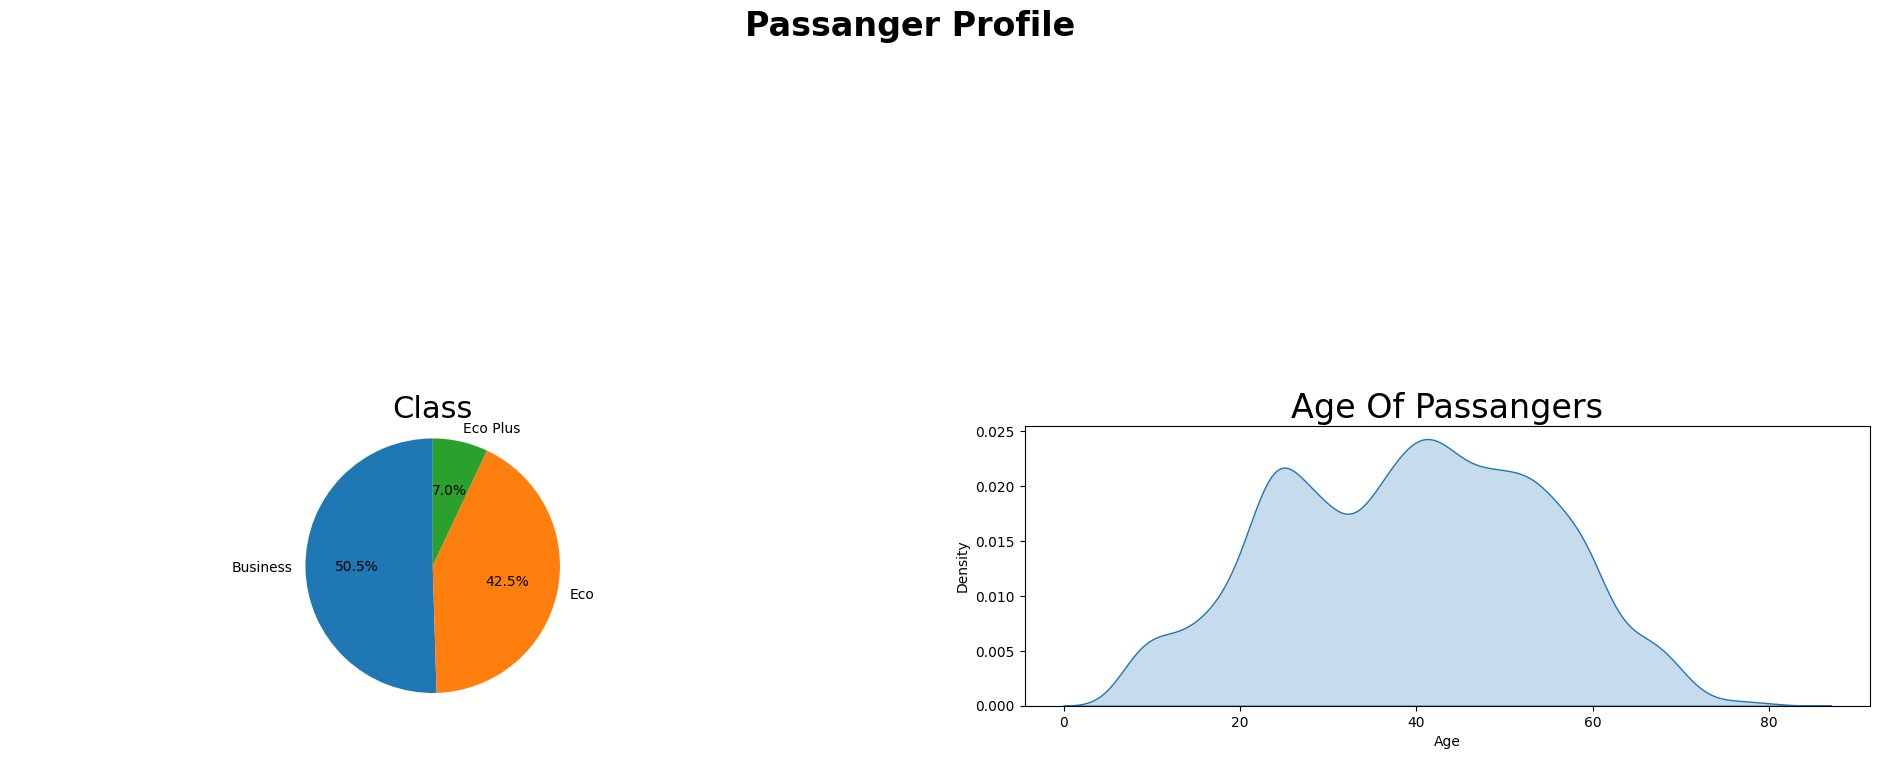

In [9]:
fig = plt.figure(figsize = (24 , 8))
plt.suptitle("Passanger Profile" , weight = 'bold' , fontsize = 24 , fontname = 'moonspace')
grid = gridspec.GridSpec(nrows = 2 , ncols = 2 , figure = fig)

ax3 = fig.add_subplot(grid[1,:1])
ax3.set_title("Class" , fontsize = 22)

label2 = list(df_train['Class'].value_counts().index)
values2 = list(df_train['Class'].value_counts().values)

ax3.pie(values2 , labels = label2 , autopct = "%1.1f%%"  , startangle = 90)
ax3.axis("equal")


ax4 = fig.add_subplot(grid[1 , 1:])
ax4.set_title("Age Of Passangers" , fontsize = 24)

ax44 = sns.kdeplot(df_train['Age'],  ax = ax4 , fill = True)

findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.


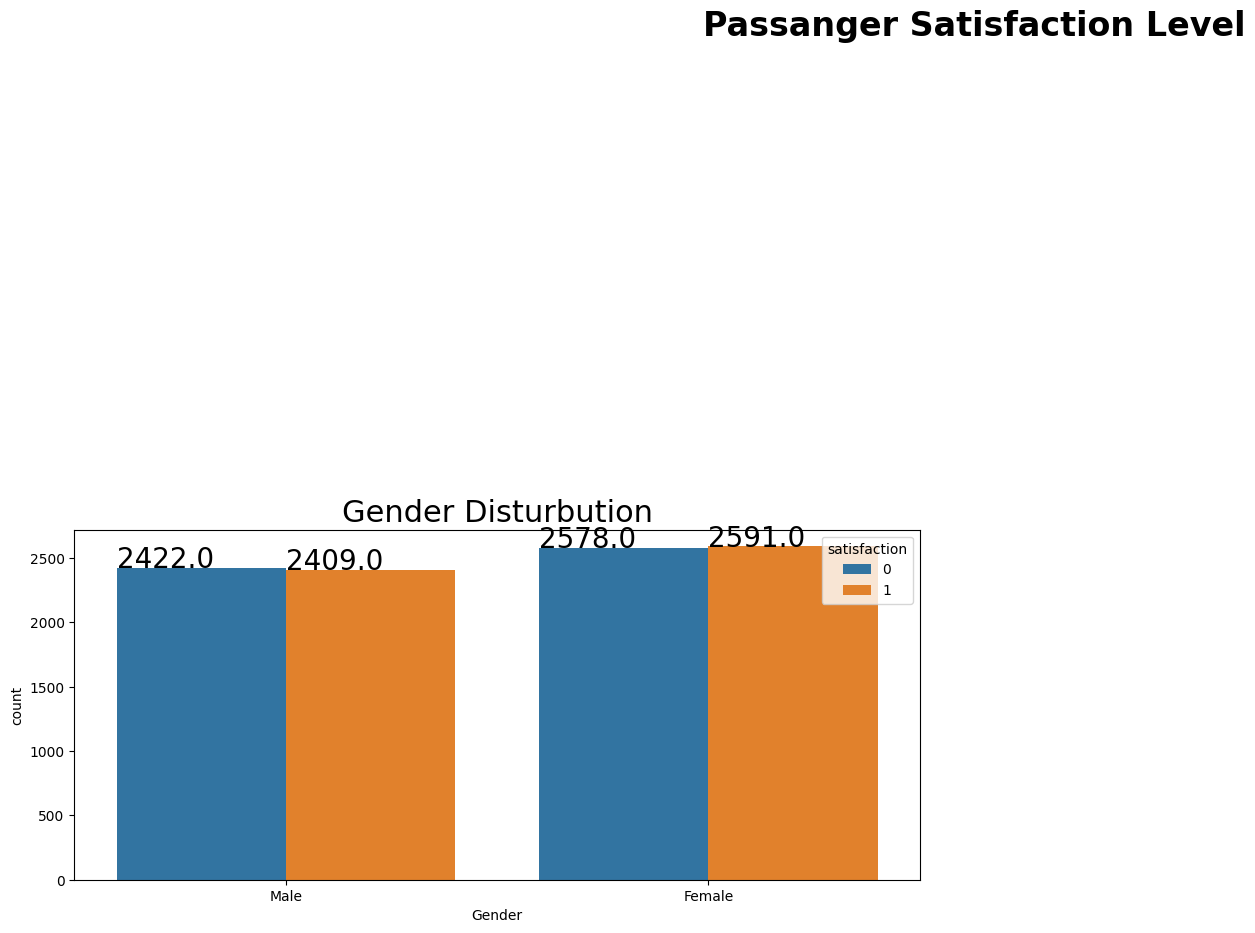

In [10]:
fig = plt.figure(figsize = (24,10))
plt.suptitle("Passanger Satisfaction Level" , weight = 'bold' , fontsize = 24 , fontname = 'moonspace')
grid = gridspec.GridSpec(nrows = 2 , ncols = 2 , figure = fig)

ax1 = fig.add_subplot(grid[1,:1])
ax1.set_title("Gender Disturbution" , fontsize = 22 )

sns.countplot(x = df_train['Gender'] , hue = df_train['satisfaction'] , ax = ax1)

for p in ax1.patches:
    ax1.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()),fontsize = 20)
plt.show()

findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.


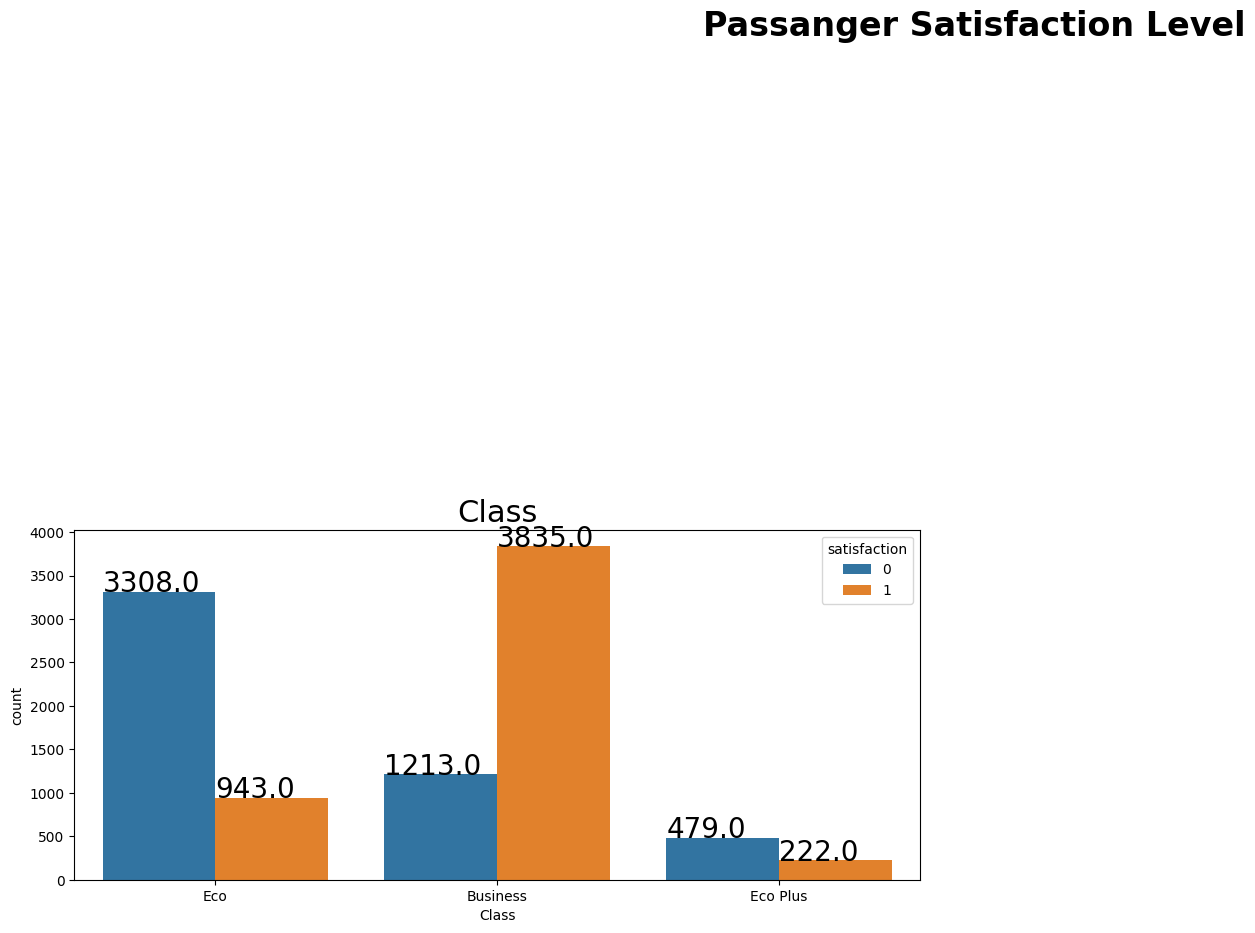

In [11]:
fig = plt.figure(figsize = (24,10))
plt.suptitle("Passanger Satisfaction Level" , weight = 'bold' , fontsize = 24 , fontname = 'moonspace')
grid = gridspec.GridSpec(nrows = 2 , ncols = 2 , figure = fig)
ax2 = fig.add_subplot(grid[1,:1])
ax2.set_title("Class",fontsize = 22)

sns.countplot(x = df_train['Class'] , hue = df_train['satisfaction'] , ax = ax2)

for p in ax2.patches:
    ax2.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()),fontsize = 20)
plt.show()

findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.


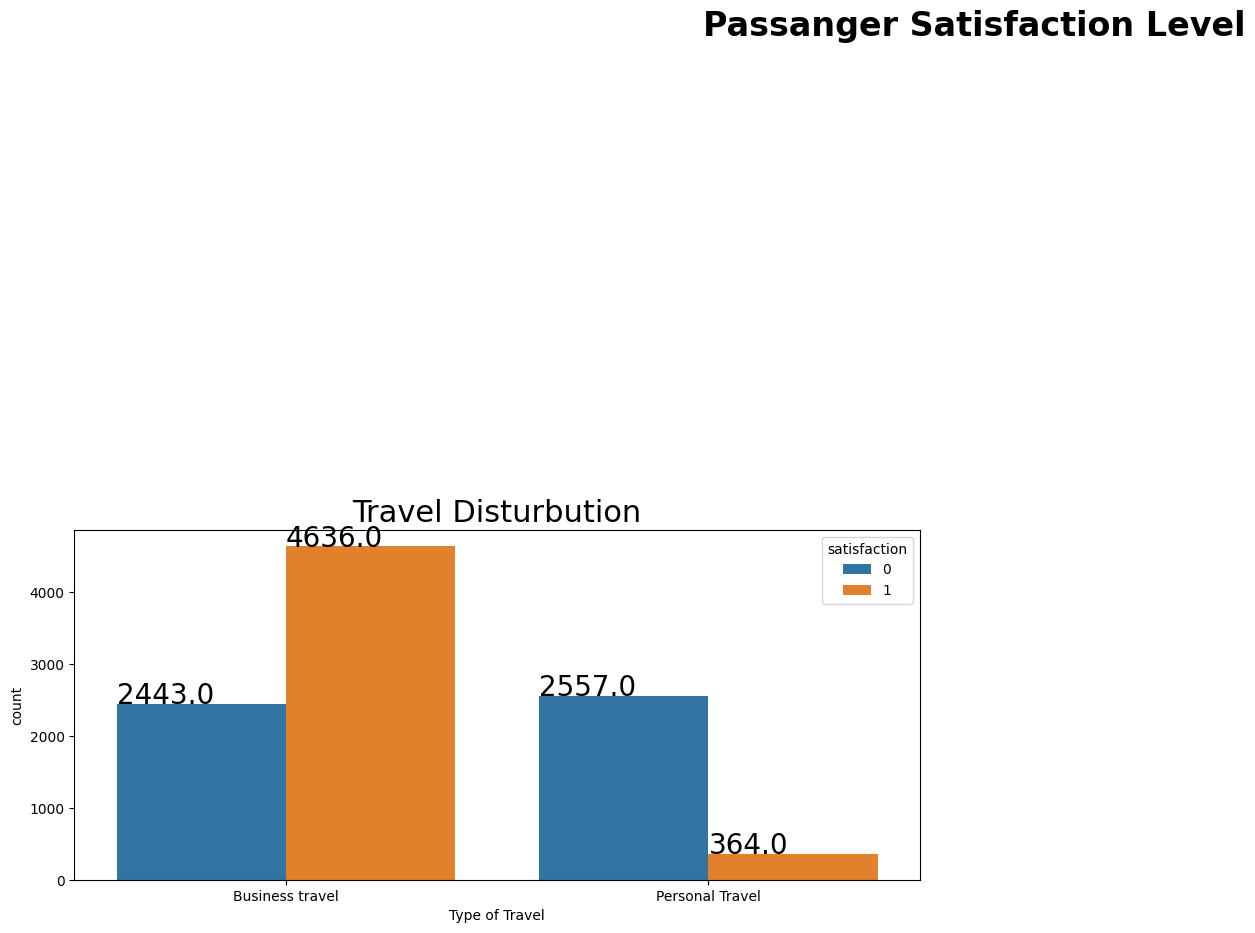

In [12]:
fig = plt.figure(figsize = (24,10))
plt.suptitle("Passanger Satisfaction Level" , weight = 'bold' , fontsize = 24 , fontname = 'moonspace')
grid = gridspec.GridSpec(nrows = 2 , ncols = 2 , figure = fig)
ax2 = fig.add_subplot(grid[1,:1])
ax2.set_title("Travel Disturbution",fontsize = 22)

sns.countplot(x = df_train['Type of Travel'] , hue = df_train['satisfaction'] , ax = ax2)

for p in ax2.patches:
    ax2.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()),fontsize = 20)
plt.show()

findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.
findfont: Font family 'moonspace' not found.


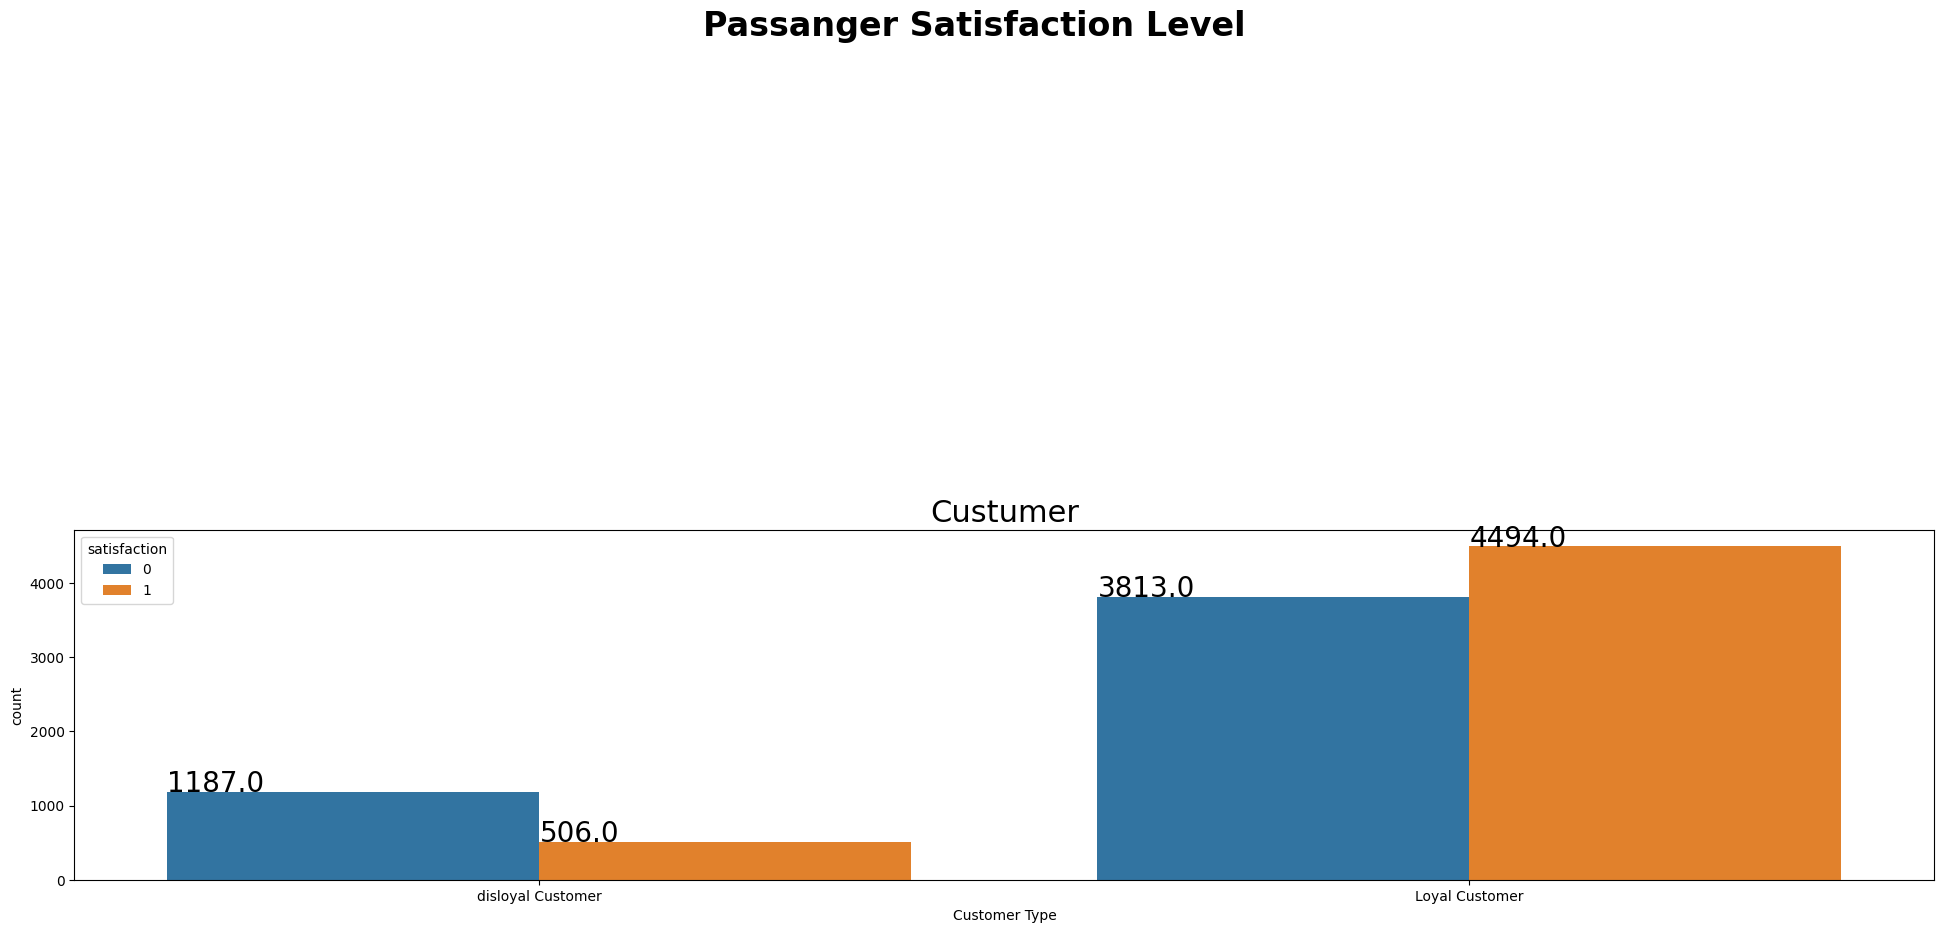

In [13]:
fig = plt.figure(figsize = (24,10))
plt.suptitle("Passanger Satisfaction Level" , weight = 'bold' , fontsize = 24 , fontname = 'moonspace')
grid = gridspec.GridSpec(nrows = 2 , ncols = 2 , figure = fig)
ax2 = fig.add_subplot(grid[1,0:4])
ax2.set_title("Custumer",fontsize = 22)

sns.countplot(x = df_train['Customer Type'] , hue = df_train['satisfaction'] , ax = ax2)

for p in ax2.patches:
    ax2.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()),fontsize = 20)
plt.show()

In [14]:
df_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
df_train.isnull().sum()

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [16]:
# num_var = df_train[['Age',"Flight Distance","Inflight wifi service","Departure/Arrival time convenient","Ease of Online booking","Gate location","Food and drink","Online boarding","Seat comfort","Inflight entertainment","Cleanliness","Departure Delay in Minutes" , "Arrival Delay in Minutes","satisfaction"]]
# num_var
num_var = df_train.select_dtypes(include=['int']).columns[5:]
num_var

Index(['Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

In [17]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0
4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,2,...,4,5,2,5,3,5,4,0,10.0,0


In [18]:
df_train["Ease of Online booking"].value_counts()

Ease of Online booking
3    2280
2    2225
4    1982
1    1615
5    1429
0     469
Name: count, dtype: int64

In [19]:
np.percentile(df_train['Flight Distance'] ,25)
np.percentile(df_train['Flight Distance'] ,75)
iqr = np.percentile(df_train['Flight Distance'] ,75) - np.percentile(df_train['Flight Distance'] ,25)
lower_bound = np.percentile(df_train['Flight Distance'] ,25) - (1.5*iqr)
upper_bound = np.percentile(df_train['Flight Distance'] ,75) + (1.5*iqr)

C:\Users\hp\AppData\Local\Temp\ipykernel_24324\2152755708.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y = 'Flight Distance', data = df_train ,ax =ax2 , shade = True , color = '#5e597e' , fill = True)


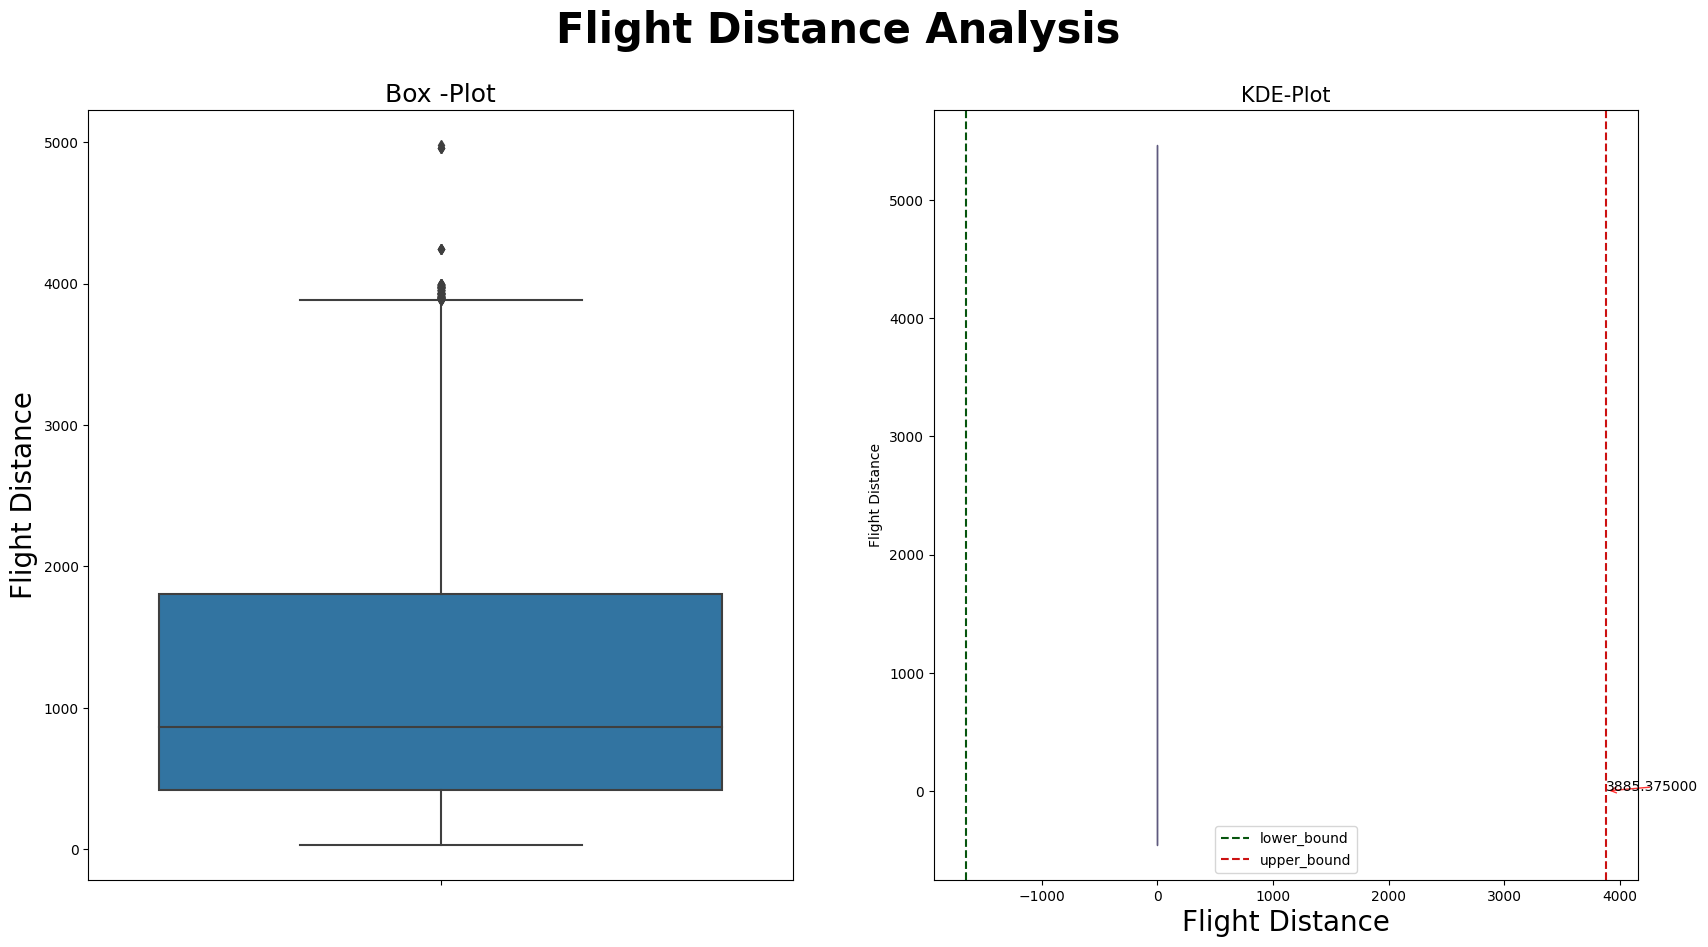

In [20]:
fig , (ax1 ,ax2)  = plt.subplots(1, 2, figsize = (20,10))
plt.suptitle("Flight Distance Analysis" , fontsize = 30 , weight = 'bold')
ax1.set_title("Box -Plot",fontsize = 18)
sns.boxplot(y = 'Flight Distance' , data = df_train , ax = ax1)
ax1.set_ylabel('Flight Distance' , fontsize = 20)


ax2.set_title('KDE-Plot' , fontsize=15)
sns.kdeplot(y = 'Flight Distance', data = df_train ,ax =ax2 , shade = True , color = '#5e597e' , fill = True)
ax2.axvline(lower_bound , linestyle = '--' , color = '#06550e' ,label = 'lower_bound')
ax2.axvline(upper_bound , linestyle = '--' , color = '#cc1111' ,label = 'upper_bound')
ax2.legend()
ax2.set_xlabel("Flight Distance",fontsize = 20)
ax2.annotate(f"{upper_bound:0f}" , xy = (upper_bound , 0.0005) , arrowprops = dict(arrowstyle="->" , color = 'r',alpha = .8))
plt.show()

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int64  
 1   Customer Type                      10000 non-null  int64  
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  int64  
 4   Class                              10000 non-null  int64  
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [30]:
df_train.replace({'Female':0, 'Male':1}, inplace=True)
df_train.replace({'disloyal Customer':0, 'Loyal Customer':1}, inplace=True)
df_train.replace({'Business travel':1, 'Personal Travel':0}, inplace=True)
df_train.replace({'Eco':0, 'Eco Plus':1, 'Business':2}, inplace=True)

df_test.replace({'Female':0, 'Male':1}, inplace=True)
df_test.replace({'disloyal Customer':0, 'Loyal Customer':1}, inplace=True)
df_test.replace({'Business travel':1, 'Personal Travel':0}, inplace=True)
df_test.replace({'Eco':0, 'Eco Plus':1, 'Business':2}, inplace=True)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int64  
 1   Customer Type                      10000 non-null  int64  
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  int64  
 4   Class                              10000 non-null  int64  
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [33]:
median  = df_train['Arrival Delay in Minutes'].median()
df_train['Arrival Delay in Minutes'].fillna(median, inplace=True)
df_train = df_train.astype({'Arrival Delay in Minutes': 'int64'})

In [42]:
median  = df_test['Arrival Delay in Minutes'].median()
df_test['Arrival Delay in Minutes'].fillna(median, inplace=True)
df_test = df_test.astype({'Arrival Delay in Minutes': 'int64'})

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             10000 non-null  int64
 1   Customer Type                      10000 non-null  int64
 2   Age                                10000 non-null  int64
 3   Type of Travel                     10000 non-null  int64
 4   Class                              10000 non-null  int64
 5   Flight Distance                    10000 non-null  int64
 6   Inflight wifi service              10000 non-null  int64
 7   Departure/Arrival time convenient  10000 non-null  int64
 8   Ease of Online booking             10000 non-null  int64
 9   Gate location                      10000 non-null  int64
 10  Food and drink                     10000 non-null  int64
 11  Online boarding                    10000 non-null  int64
 12  Seat comfort           

In [38]:
df_train.corrwith(df_train['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Class                                0.518931
Online boarding                      0.504986
Type of Travel                       0.482266
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Customer Type                        0.181592
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048573
Departure Delay in Minutes           0.042960
Gate location                     

In [ ]:
print(f"Mavjud bo'lmagan qiymatlar soni: {df_train.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = df_train[df_train.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df_train)*100)}%")

In [43]:
df_test.info(
)

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 1 to 4000
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             4000 non-null   int64
 1   Customer Type                      4000 non-null   int64
 2   Age                                4000 non-null   int64
 3   Type of Travel                     4000 non-null   int64
 4   Class                              4000 non-null   int64
 5   Flight Distance                    4000 non-null   int64
 6   Inflight wifi service              4000 non-null   int64
 7   Departure/Arrival time convenient  4000 non-null   int64
 8   Ease of Online booking             4000 non-null   int64
 9   Gate location                      4000 non-null   int64
 10  Food and drink                     4000 non-null   int64
 11  Online boarding                    4000 non-null   int64
 12  Seat comfort             

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
train_set, test_set = train_test_split(df_train, test_size=0.1, random_state=20)

In [82]:
# encoded = pd.get_dummies(df_train)
# encoded.head()

In [83]:
x = train_set.drop("satisfaction" , axis=1)
y = train_set['satisfaction'].copy()
pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())
])

In [84]:
x_prep = pipeline.fit_transform(x)
x_prep[0:2 , :]

array([[-0.96548419,  0.45595127,  0.84963514,  0.64065376,  0.9594569 ,
         1.58935244, -0.57325398, -0.04012402,  0.14444073,  0.0105614 ,
        -0.90965743, -0.25510386, -0.37432135, -1.05737277, -1.14483555,
        -1.08002147, -1.41694618, -0.29101398, -1.43714829,  0.52703327,
         0.47621529,  0.46587302],
       [-0.96548419,  0.45595127, -1.64600741,  0.64065376,  0.9594569 ,
         0.35551823,  1.63156902,  1.27064262,  1.55514777,  1.5688008 ,
         0.58813197,  0.48504274,  0.38908045,  0.44410324,  1.21492931,
        -1.08002147,  0.26822272,  0.5036237 ,  0.26945345,  0.52703327,
        -0.36755375, -0.37108031]])

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_model = RandomForestRegressor()
rf_model.fit(x_prep, y)

RandomForestRegressor()

In [86]:
test_data = x.sample(9000)
test_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
9976,0,1,34,0,1,600,2,3,2,2,...,4,5,3,4,2,4,2,5,0,0
1128,1,1,24,0,0,647,3,3,3,3,...,3,3,4,2,4,4,3,3,69,62
3482,0,0,21,1,2,337,2,3,1,3,...,4,4,4,2,3,3,4,4,15,31
8725,1,0,20,1,0,634,4,4,4,5,...,2,2,5,2,1,5,5,2,0,0
1695,1,1,21,1,0,647,5,2,2,2,...,3,5,4,5,4,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5765,1,1,35,1,1,140,5,3,3,3,...,5,5,1,5,4,3,5,5,0,0
1953,1,1,40,1,0,978,3,4,3,4,...,3,3,2,4,2,1,2,3,11,11
7454,1,1,32,1,0,260,4,3,4,4,...,4,4,5,4,5,4,5,4,17,22


In [87]:
test_label = y.loc[test_data.index]
test_label

id
9976    0
1128    0
3482    0
8725    1
1695    1
       ..
5765    1
1953    1
7454    1
353     1
6652    1
Name: satisfaction, Length: 9000, dtype: int64

In [88]:
test_data_prep = pipeline.transform(test_data)
test_data_prep

array([[-0.96548419,  0.45595127, -0.36446124, ...,  1.29060368,
        -0.36755375, -0.37108031],
       [ 1.03574974,  0.45595127, -1.03895923, ..., -0.23653715,
         1.39669062,  1.20137746],
       [-0.96548419, -2.19321684, -1.24130862, ...,  0.52703327,
         0.01597763,  0.41514858],
       ...,
       [ 1.03574974,  0.45595127, -0.49936084, ...,  0.52703327,
         0.06711515,  0.18688858],
       [ 1.03574974,  0.45595127, -0.09466205, ..., -0.23653715,
        -0.31641623, -0.37108031],
       [ 1.03574974,  0.45595127, -1.37620822, ...,  1.29060368,
        -0.36755375, -0.37108031]])

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4519
           1       0.50      0.50      0.50      4481

    accuracy                           0.50      9000
   macro avg       0.50      0.50      0.50      9000
weighted avg       0.50      0.50      0.50      9000

Model aniqligi: 0.49877777777777776


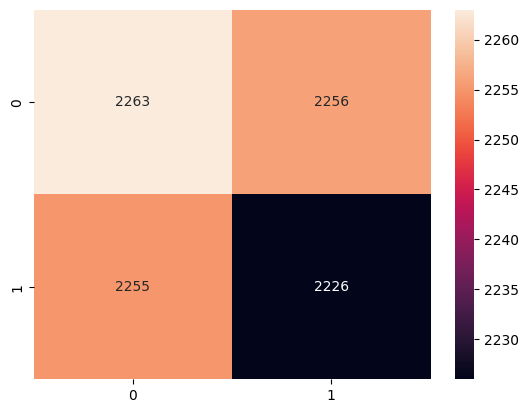

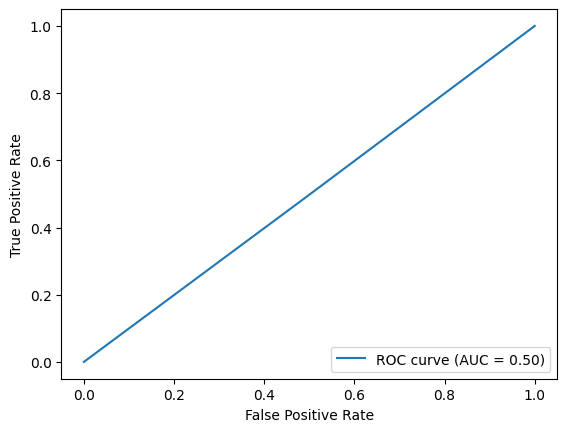

In [89]:
y_pred = xgb_model.predict(test_data_prep)

print(metrics.classification_report(y, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y,y_pred))

conf_mat = metrics.confusion_matrix(y, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [90]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 9958 to 870
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             1000 non-null   int64
 1   Customer Type                      1000 non-null   int64
 2   Age                                1000 non-null   int64
 3   Type of Travel                     1000 non-null   int64
 4   Class                              1000 non-null   int64
 5   Flight Distance                    1000 non-null   int64
 6   Inflight wifi service              1000 non-null   int64
 7   Departure/Arrival time convenient  1000 non-null   int64
 8   Ease of Online booking             1000 non-null   int64
 9   Gate location                      1000 non-null   int64
 10  Food and drink                     1000 non-null   int64
 11  Online boarding                    1000 non-null   int64
 12  Seat comfort           

In [91]:
x_test = test_set.drop('satisfaction' , axis=1)
x_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
9958,1,1,50,1,2,1979,3,3,4,3,...,5,3,3,3,3,2,3,1,0,0
1688,0,1,53,1,2,3083,0,0,0,5,...,5,2,2,2,2,1,2,1,0,0
2117,0,1,25,1,2,1553,4,4,4,4,...,4,4,5,4,1,1,1,4,0,0
232,1,1,37,1,1,521,4,5,5,5,...,4,4,5,3,1,5,1,4,0,0
2781,0,1,42,1,0,1009,2,4,4,4,...,2,2,2,2,2,3,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,1,1,50,1,2,2168,3,3,3,3,...,5,5,5,5,5,4,5,4,6,24
5215,0,1,47,1,2,308,0,0,0,3,...,4,4,4,4,4,4,4,5,2,0
6125,0,0,36,1,2,1389,2,2,2,2,...,5,5,5,2,5,5,5,5,2,0


In [92]:
x_data_prep = pipeline.fit_transform(x_test)
x_data_prep

array([[ 1.02224741,  0.41015156,  0.70091861, ..., -1.75368408,
        -0.33702763, -0.33513441],
       [-0.97823676,  0.41015156,  0.89418661, ..., -1.75368408,
        -0.33702763, -0.33513441],
       [-0.97823676,  0.41015156, -0.90964805, ...,  0.51108228,
        -0.33702763, -0.33513441],
       ...,
       [-0.97823676, -2.43812314, -0.20099872, ...,  1.2660044 ,
        -0.29185875, -0.33513441],
       [-0.97823676,  0.41015156,  0.12111461, ...,  1.2660044 ,
        -0.33702763, -0.33513441],
       [-0.97823676, -2.43812314, -1.03849339, ..., -1.75368408,
        -0.33702763, -0.33513441]])

In [93]:
y_test = test_set['satisfaction'].copy()
y_test

In [95]:
y_predict = rf_model.predict(x_data_prep)

In [97]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predict)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.20341140577656897


In [100]:
sub = pipeline.fit_transform(df_test)

In [101]:
sub_pred = rf_model.predict(sub)
sub_pred

array([0.  , 0.41, 1.  , ..., 0.  , 0.74, 0.  ])

In [102]:
sample_sub['satisfaction'] = sub_pred

In [103]:
sample_sub

,satisfaction
id,
1,0.00
2,0.41
3,1.00
4,1.00
5,0.12
...,...
3996,0.96
3997,0.00
3998,0.00


In [104]:
sample_sub.to_csv("submission_2c.csv")

In [105]:
sub = pd.read_csv(r"C:\Users\hp\submission_2c.csv" ,index_col = 0)

In [106]:
sub

,satisfaction
id,
1,0.00
2,0.41
3,1.00
4,1.00
5,0.12
...,...
3996,0.96
3997,0.00
3998,0.00
